Adam Peetz<BR>
MSDS 650 Week 1 Assignment<BR>
Submission 2 <br>
Regis University<BR>
# MovieLens<BR>
    
The MovieLens database is a collection of over 1 million anonymous ratings of 3,900 movies maintained by the University of Minnesota. The ratings were made by 6,040 users starting in the year 2000. (F. Maxwell Harper and Joseph A. Konstan. 2015.) The MovieLens database is commonly used in academics to demonstrate recommender systems which are the workhorses of billion dollar streaming services like Hulu and Netflix. <br>
    
To better understand the MovieLens database, exploratory data analysis was conducted on the dataset to answer the following questions:<br>
    <br>
2a) Which movie have the highest average rating? <br>
2b) What about the movie with the lowest rating?<br>
2c) Which movie has the most ratings in our dataset?<br>
2d) List the 10 users who have rated the most movies?<br>
    <br>
3) Define 5 questions you would like to investigate within this dataset.<br>
     <br>
Market segment research drives value for marketing departments. From this perspective, the database has been broken up and reviewed in different segments to look for insights in the data.<br>
    <br>
3a) What is the most rated movie with both men and women?<br>
3b) What is the highest rated movie with kids?<br>
3c) What is the age distribution of users in the database?<br>
3d) What is the distribution of movie ratings in the database?<br>
3e) What jobs do the kids have in the database?<br>
    


## 1) Describe what info() and shape functions are used for? What information is returned from these functions? Why is this information helpful?
    
The shape and info functions are good for getting an extremely high level picture of the data and are particularly helpful for cleaning the data. The info() function calls out all of the data types in each column. For example, time was originally dictated as a integer but later converted to a date time format. They also help you identify the total number of entries in the database (1 million) and the number of features included in that database (10 columns). Finally, any null values will be identified so they could be dropped or filled. In the case of the movielens database. There are no null values.<br>


In [1]:
# import required libraries
import pandas as pd
import seaborn as sns

In addition to loading data. It must be cleaned prior to performing any sort of data analysis. In the case of the MovieLens database, time, age, and occupation are presented in a non-human readable integer format. The those fields have been transformed from numbers to human readable format in the code below

In [2]:
#create column names for movie CSV
m_cols = ['movie_id', 'title', 'genres']

#import movie CSV
movies_df = pd.read_csv('assign_wk1/movies.dat', sep=';', names=m_cols)

#create column names for ratings CSV
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

#import ratings CSV
ratings_df = pd.read_csv('assign_wk1/ratings.dat', sep=';', names=r_cols)

#import user CSV file and 
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']

users_df = pd.read_csv('assign_wk1/users.dat', sep=';', names=u_cols)


# merge movies_df with ratings_df
movie_ratings_df = pd.merge(movies_df, ratings_df)

# now movies_ratings_df with users_df
lens_df = pd.merge(movie_ratings_df, users_df)

#convert age to human readable format
lens_df['age'] = lens_df['age'].replace({1:"Under 18", 18: "18-24", 25:  "25-34", 35:  "35-44", 45: \
                                         "45-49", 50:  "50-55", 56:  "56+"\
                                        })
#convert occupation to human readable format     
lens_df['occupation'] = lens_df['occupation'].replace({ 0:  "other or not specified", 1:  "academic/educator", 2:  "artist",\
                                                        3:"clerical/admin", 4:  "college/grad student", 5:  "customer service" ,\
                                                        6:  "doctor/health care", 7:  "executive/managerial", 8:  "farmer", \
                                                        9:  "homemaker", 10:  "K-12 student", 11:  "lawyer", \
                                                        12:  "programmer", 13:  "retired", 14:  "sales/marketing", 15:  "scientist", \
                                                        16:  "self-employed", 17:  "technician/engineer", \
                                                        18:  "tradesman/craftsman",  19:  "unemployed", 20:  "writer" \
                                                        })

#display sample of data
lens_df.head(5)

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,Under 18,K-12 student,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,Under 18,K-12 student,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,Under 18,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,Under 18,K-12 student,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,Under 18,K-12 student,48067


### REQUIRED OUTPUT: Dataframe reshaping: removal of rows or columns

Non-essential columns can also be dropped from the dataframe. No time based analysis will be performed on the lens dataset so the unix_timestamp column can be dropped.

In [3]:
#create list of columns to remove
drop_cols = ['unix_timestamp']

#drop columns from lens database in place
lens_df.drop(drop_cols,axis=1,inplace=True)

In [4]:
#sample lens database to show removed header
lens_df.head(1)

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,Under 18,K-12 student,48067


### REQUIRED OUTPUT: .apply() lambda x

Formatting can also be applied at this time. In the case of the lens dataframe. We want all of the genre callouts to be uppercase. This can be done succinctly in one line of code using a lambda function to apply pythons .upper function to the genres column. The output of the capitalization application is shown below.


In [5]:
lens_df['genres'] =  lens_df['genres'].apply(lambda s: s.upper())

In [6]:
lens_df.head(1)

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
0,1,Toy Story (1995),ANIMATION|CHILDREN'S|COMEDY,1,5,F,Under 18,K-12 student,48067


### REQUIRED OUTPUT: Conditional Formatting

Color formatting can also help draw attention to points of interest. Color gradients are a great way to highlight the difference between high and low numbers in a data set. Here a gradient, applied to user 1's data.


In [39]:
# filter to reduce datadframe size
userone_df=lens_df[lens_df['user_id']==1]

In [40]:
#specify color map
cm = sns.light_palette("green", as_cmap=True)

#apply gradient
userone_df.style.background_gradient(cmap=cm)

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
0,1,Toy Story (1995),ANIMATION|CHILDREN'S|COMEDY,1,5,F,Under 18,K-12 student,48067
1,48,Pocahontas (1995),ANIMATION|CHILDREN'S|MUSICAL|ROMANCE,1,5,F,Under 18,K-12 student,48067
2,150,Apollo 13 (1995),DRAMA,1,5,F,Under 18,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope (1977),ACTION|ADVENTURE|FANTASY|SCI-FI,1,4,F,Under 18,K-12 student,48067
4,527,Schindler's List (1993),DRAMA|WAR,1,5,F,Under 18,K-12 student,48067
5,531,"Secret Garden, The (1993)",CHILDREN'S|DRAMA,1,4,F,Under 18,K-12 student,48067
6,588,Aladdin (1992),ANIMATION|CHILDREN'S|COMEDY|MUSICAL,1,4,F,Under 18,K-12 student,48067
7,594,Snow White and the Seven Dwarfs (1937),ANIMATION|CHILDREN'S|MUSICAL,1,4,F,Under 18,K-12 student,48067
8,595,Beauty and the Beast (1991),ANIMATION|CHILDREN'S|MUSICAL,1,5,F,Under 18,K-12 student,48067
9,608,Fargo (1996),CRIME|DRAMA|THRILLER,1,4,F,Under 18,K-12 student,48067


### REQUIRED OUTPUT: .info()

The .info() function is useful for getting an initial picture of the dataframe after it has been created. It shows 1000209 entries in the dataset spread across 9 different columns. There are no null values. Our dataframe size is also listed. This dataframe only takes up 76.5 mb of memory and has a mixture of integer and object types.

In [7]:
lens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1000209 non-null  int64 
 1   title       1000209 non-null  object
 2   genres      1000209 non-null  object
 3   user_id     1000209 non-null  int64 
 4   rating      1000209 non-null  int64 
 5   sex         1000209 non-null  object
 6   age         1000209 non-null  object
 7   occupation  1000209 non-null  object
 8   zip_code    1000209 non-null  object
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### REQUIRED OUTPUT: .shape

Shape is another way to get a basic high level overview of the dataframe we have created. It lists the number of rows and columns. There are 1000209 rows and 9 columns in the lens dataframe. 


In [8]:
lens_df.shape

(1000209, 9)

### REQUIRED OUTPUT: .describe

The describe function pulls out a sample of the data contained in the each column of the dataframe. It shows the type of entries you can expect for things like movies, ages, and genres in the dataframe.

In [9]:
lens_df.describe

<bound method NDFrame.describe of          movie_id                                      title  \
0               1                           Toy Story (1995)   
1              48                          Pocahontas (1995)   
2             150                           Apollo 13 (1995)   
3             260  Star Wars: Episode IV - A New Hope (1977)   
4             527                    Schindler's List (1993)   
...           ...                                        ...   
1000204      3513                 Rules of Engagement (2000)   
1000205      3535                     American Psycho (2000)   
1000206      3536                   Keeping the Faith (2000)   
1000207      3555                               U-571 (2000)   
1000208      3578                           Gladiator (2000)   

                                       genres  user_id  rating sex       age  \
0                 ANIMATION|CHILDREN'S|COMEDY        1       5   F  Under 18   
1        ANIMATION|CHILDREN'S|MUSICAL

## 2a) Which movie has the highest average rating?
    
There are multiple movies with a 5 star average rating. Two of them are Ulysses and Lured. These two movies have only 1 rating submitted, which happened to be 5 stars. Bumping them to the top of the list.

### REQUIRED OUTPUT:   aggregration (.agg)

In [32]:
#list of highest rated movies
(lens_df.groupby(['title'])
.agg( {'rating':['mean']} )
.sort_values(by=[('rating','mean')],ascending=False))

,rating
,mean
title,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0
...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1.0
Cheetah (1989),1.0


In [11]:
#create filter to explore top two rated movies
ulysses_df=lens_df[lens_df['title']=='Ulysses (Ulisse) (1954)']
lured_df=lens_df[lens_df['title']=='Lured (1947)']

In [12]:
#review ulysses movie data
ulysses_df.head()

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
985157,3172,Ulysses (Ulisse) (1954),ADVENTURE,3485,5,M,25-34,other or not specified,94121


In [13]:
#review lured movie data
lured_df.head()

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
979840,3656,Lured (1947),CRIME,5313,5,M,56+,other or not specified,55406


## 2b) What about the movie with the lowest rating?

There are multiple movies with a 1 star average rating. Two of them are Elstree Calling and Get Over It. Similar to the highest rated movies, these have a low number of total ratings submitted. Dragging them down to the bottom of the list due to the opinion of a few users.


In [14]:
#list of lowest rated movies
lens_df.groupby('title')['rating'].mean().sort_values(ascending=True).head(10)

title
Elstree Calling (1930)                                        1.0
Get Over It (1996)                                            1.0
Venice/Venice (1992)                                          1.0
Windows (1980)                                                1.0
Kestrel's Eye (Falkens �ga) (1998)                            1.0
McCullochs, The (1975)                                        1.0
Sleepover (1995)                                              1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Spring Fever USA (a.k.a. Lauderdale) (1989)                   1.0
Santa with Muscles (1996)                                     1.0
Name: rating, dtype: float64

In [15]:
#create filter to explore lowest two rated movies
elstree_df=lens_df[lens_df['title']=='Elstree Calling (1930)']
get_df=lens_df[lens_df['title']=='Get Over It (1996)']

In [16]:
#review elstree movie data
elstree_df.head()

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
605977,2217,Elstree Calling (1930),COMEDY|MUSICAL,3610,1,M,18-24,doctor/health care,30064


In [17]:
#review get over it movie data
get_df.head()

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
642178,1142,Get Over It (1996),DRAMA,1470,1,M,18-24,college/grad student,94118
862540,1142,Get Over It (1996),DRAMA,3598,1,M,56+,academic/educator,90210


## 2c) Which movie has the most ratings in our dataset?
    
The movie with the most ratings is American Beauty, which has 3428 ratings. It is followed by the movies in the Original Star Wars trilogy.

In [18]:
#create list of movies with the highest rating count
lens_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: rating, dtype: int64

## 2d) List the 10 users who have rated the most movies?

Our top user is user # 4169 who has rated 2314 movies. He is a 50-55 year old man from Leavenworth Kansas, with an unspecified occupation. (Although his job appears to be rating movies). The list of the top ten users id's is below.

In [19]:
#create list of users with highest rating count
lens_df.groupby('user_id')['title'].count().sort_values(ascending=False).head(10)

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: title, dtype: int64

In [20]:
#create filter to explore top user
fouronesixnine_df=lens_df[lens_df['user_id']==4169]

In [21]:
#sample top users data
fouronesixnine_df.head(3)

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
610634,2,Jumanji (1995),ADVENTURE|CHILDREN'S|FANTASY,4169,3,M,50-55,other or not specified,66048
610635,3,Grumpier Old Men (1995),COMEDY|ROMANCE,4169,2,M,50-55,other or not specified,66048
610636,4,Waiting to Exhale (1995),COMEDY|DRAMA,4169,3,M,50-55,other or not specified,66048


# Market segment research

In [22]:
#create segment filters
C
womens_df=lens_df[lens_df['sex']=='F']
kids_df=lens_df[lens_df['age']=='Under 18']

## 3a) What are the most rated movies for men and women?

There are many similarities between the movies rated by men and women. However, women tend to rate more drama's and suspense films than men, movies like Shakespeare in Love and Silence of the Lambs. Men have rated move action movies, like Terminator and Jurassic Park.


In [23]:
#womens top movies by % of ratings submitted
womens_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10) / womens_df.shape[0]

title
American Beauty (1999)                                   0.003839
Shakespeare in Love (1998)                               0.003238
Silence of the Lambs, The (1991)                         0.002865
Sixth Sense, The (1999)                                  0.002694
Groundhog Day (1993)                                     0.002670
Fargo (1996)                                             0.002666
Star Wars: Episode VI - Return of the Jedi (1983)        0.002650
Star Wars: Episode V - The Empire Strikes Back (1980)    0.002629
Star Wars: Episode IV - A New Hope (1977)                0.002625
Forrest Gump (1994)                                      0.002613
Name: rating, dtype: float64

In [24]:
#mens top movies by % of ratings submitted
mens_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10) / mens_df.shape[0]

title
American Beauty (1999)                                   0.003293
Star Wars: Episode IV - A New Hope (1977)                0.003110
Star Wars: Episode V - The Empire Strikes Back (1980)    0.003107
Star Wars: Episode VI - Return of the Jedi (1983)        0.002958
Terminator 2: Judgment Day (1991)                        0.002909
Jurassic Park (1993)                                     0.002785
Saving Private Ryan (1998)                               0.002757
Matrix, The (1999)                                       0.002754
Men in Black (1997)                                      0.002653
Back to the Future (1985)                                0.002579
Name: rating, dtype: float64

## 3b) What is are the most popular movies for kids?

Based on ratings, the most popular movie for users under the age of 18 is Toy Story, with 112 ratings. Star Wars also has a commanding presence on this list, occupying 4 of the top 10 slots.

In [25]:
#create list of movies popular with kids.
kids_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Toy Story (1995)                                         112
Sixth Sense, The (1999)                                  109
Star Wars: Episode IV - A New Hope (1977)                101
Star Wars: Episode VI - Return of the Jedi (1983)        100
Men in Black (1997)                                      100
Matrix, The (1999)                                        99
Toy Story 2 (1999)                                        99
American Beauty (1999)                                    92
Star Wars: Episode V - The Empire Strikes Back (1980)     92
Star Wars: Episode I - The Phantom Menace (1999)          91
Name: rating, dtype: int64

## 3c) What is the age distribution of users in the database?

The majority of the users in our database are between the ages of 25 and 34. Followed closely by 35 and 18-24. The smallest user group in our data set is users under the age of 18.

<AxesSubplot:xlabel='User Age', ylabel='user_id'>

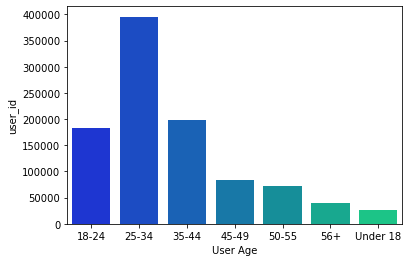

In [26]:
#create age graph
agegraph=lens_df.groupby('age').count()
agegraph['User Age'] = ["18-24","25-34","35-44","45-49","50-55","56+","Under 18"]
sns.barplot(x='User Age',y='user_id',data=agegraph,palette='winter')



## 3d) What is the distribution of movie ratings in the database?

Our ratings distribution skews to the right, more movies are given high ratings than low ones. The most popular rating is a 4, followed closely by 3 and 5. 1 is the least given rating in data set, suggesting it takes alot for someone to reduce a movie with a score of 1.


<AxesSubplot:xlabel='User Rating', ylabel='user_id'>

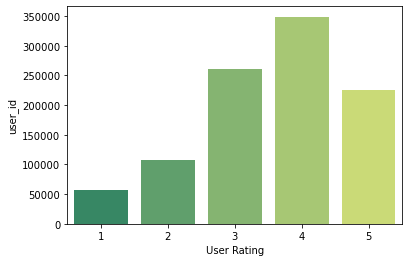

In [27]:
#create ratings graph
ratinggraph=lens_df.groupby('rating').count().sort_values(by='rating', ascending=True,)
ratinggraph['User Rating'] = [1,2,3,4,5]
sns.barplot(x='User Rating',y='user_id',data=ratinggraph,palette='summer')

### REQUIRED OUPUT: Boxplots

Another way to visualize the distribution of ratings is with a boxplot. The box on the boxplot represents expected values within the first and third quartiles of our distribution, centered around the median rating of 3.5. The whiskers represent our min and max values. Any rating outside the whiskers is an outlier. In this case, all of the movies with ratings of a 1 are outliers in the dataset. 

<AxesSubplot:>

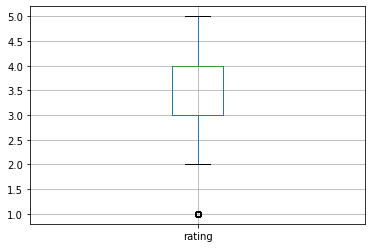

In [28]:
#call boxplot
lens_df.boxplot('rating')

## 3e) What jobs do the kids have in the database?

I wanted to see what occupations the users under 18 had selected. 1 of the users under the age of 18 claims to be retired, and others claim to be lawyers. I suspect we have some young tricksters creating humorous user profiles in our data set.


In [29]:
#review kids filter for jobs
kids_df['occupation'].value_counts() / kids_df.shape[0]

K-12 student              0.722722
other or not specified    0.141266
unemployed                0.054941
academic/educator         0.025210
programmer                0.016390
executive/managerial      0.010437
artist                    0.009849
college/grad student      0.008122
sales/marketing           0.005365
technician/engineer       0.002168
farmer                    0.001580
lawyer                    0.001102
retired                   0.000845
Name: occupation, dtype: float64

In [30]:
#filter for retired kids
retiredkids_df=kids_df[kids_df['occupation']=='retired']

In [31]:
#preview retired kids data
retiredkids_df.head(1)

,movie_id,title,genres,user_id,rating,sex,age,occupation,zip_code
998752,913,"Maltese Falcon, The (1941)",FILM-NOIR|MYSTERY,4413,4,M,Under 18,retired,37130


### Biblyography

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872